~~~~~~~~~~~CONVOLUTION REVERB~~~~~~~~~~~

Audio Selection Menu

1. Faded Instrumental(0:45)
2. Craddle(0:12)
3. Pirates Of The Caribbean(0:13)
4. RECORD AUDIO NOW !

2

Press "Enter" to stop the music playback


Is this selection fine?
"Yes" - Proceed
"No" - Reselect:
Yes

Plotting in Time Domain...


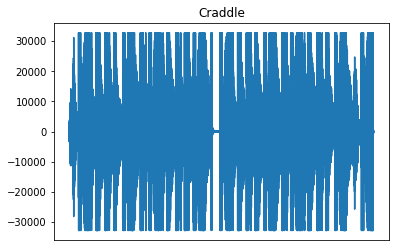


Plotting in Frequency Domain...


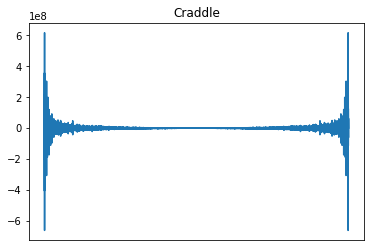


Environment Selection Menu:

1. Chruch
2. Dome
3. Fort
4. GunRange
5. Large Hall(100feet x 100feet)
6. Small Room(10feet x 10feet)

4

COMPUTING FINAL SIGNAL...


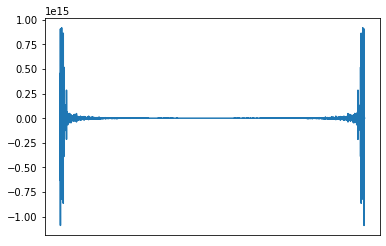


Plotting Final Audio


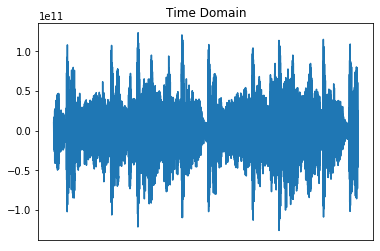

EXPORTING MENU...

Enter the number of left to right stereo panning(less than 5):
2

Panning Audio...

Encoding into .wav


In [9]:
import scipy.io                             
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time
import sys

from tqdm import tqdm_notebook as tqdm
from scipy.io.wavfile import read,write
from IPython.display import Audio

resel='No'
audiochoice = 0
envchoice = 0
fs = 44100  
seconds = int(0)
sd.default.samplerate = fs
strt=''
angle=-45.0
flag=0
t1=0

print("~~~~~~~~~~~CONVOLUTION REVERB~~~~~~~~~~~")
print("\nAudio Selection Menu")

while(resel=='No'):
    print("\n1. Faded Instrumental(0:45)\n2. Craddle(0:12)\n3. Pirates Of The Caribbean(0:13)\n4. RECORD AUDIO NOW !\n")
    audiochoice=int(input())
    while(audiochoice<1 or audiochoice>4):
        print("\nInvalid Chioce! Please re-enter")
        audiochoice=int(input())
        
    if(audiochoice==1):
        strt='Faded Instrumental'
        sr1,data1=read("Faded_Instrumental.wav")
        if(data1.ndim>1):
            data1=data1[:,0]
        sd.play(data1)
        print("\nPress \"Enter\" to stop the music playback")
        input()
        sd.stop()
    
    elif(audiochoice==2):
        strt='Craddle'
        sr1,data1=read("Craddle.wav")
        if(data1.ndim>1):
            data1=data1[:,0]
        sd.play(data1)
        print("\nPress \"Enter\" to stop the music playback")
        input()
        sd.stop()
        
    elif(audiochoice==3):
        strt='Pirates Of The Caribbean'
        sr1,data1=read("Pirates Of The Caribbean.wav")
        if(data1.ndim>1):
            data1=data1[:,0]
        sd.play(data1)
        print("\nPress \"Enter\" to stop the music playback")
        input()
        sd.stop()
        
    elif(audiochoice==4):
        strt='Recording'
        print("\nEnter in seconds the time you want to speak(minimum 3 seconds):")
        seconds=int(input())
        print("\nRECORDING IN ")
        for remaining in range(3, 0,-1):
            sys.stdout.write("\r")
            sys.stdout.write("{:2d} ".format(remaining))
            sys.stdout.flush()
            time.sleep(0.75)
        print("\nRecording...")
        myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
        for i in tqdm(range(seconds*100)):
             time.sleep(0.01)
        myrecording=myrecording[:,0]
        data1=myrecording
        sd.play(data1,fs)
        
        
    print("\nIs this selection fine?\n\"Yes\" - Proceed\n\"No\" - Reselect:")
    resel=input()
    while(resel!='Yes' and resel!='No'):
        print("\nInvalid Answer, only \"Yes\" or \"No\" are accepted!")
        resel=input()
        
t2=data1.size
left=np.zeros(t2)
right=np.zeros(t2)

print("\nPlotting in Time Domain...")
plt.title(strt)
plt.plot(data1)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
dat=np.fft.fft(data1)
print("\nPlotting in Frequency Domain...")
plt.title(strt)
plt.plot(dat)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

print("\nEnvironment Selection Menu:\n")
print("1. Chruch\n2. Dome\n3. Fort\n4. GunRange\n5. Large Hall(100feet x 100feet)\n6. Small Room(10feet x 10feet)\n")
envchoice=int(input())
while(envchoice<1 or envchoice>6):
    print("\nInvalid Chioce! Please re-enter")
    envchoice=int(input())

if envchoice==1:
    sr2,data2=read("Chruch.wav")
    if(data2.ndim>1):
        data2=data2[:,0]
        
elif envchoice==2:
    sr2,data2=read("Dome.wav")
    if(data2.ndim>1):
        data2=data2[:,0]
        
elif envchoice==3:
    sr2,data2=read("Fort.wav")
    if(data2.ndim>1):
        data2=data2[:,0]
        
elif envchoice==4:
    sr2,data2=read("GunRange.wav")
    if(data2.ndim>1):
        data2=data2[:,0]
        
elif envchoice==5:
    sr2,data2=read("LargeHall.wav")
    if(data2.ndim>1):
        data2=data2[:,0]
        
elif envchoice==6:
    sr2,data2=read("SmallRoom.wav")
    if(data2.ndim>1):
        data2=data2[:,0]

print("\nCOMPUTING FINAL SIGNAL...")

temp1=np.zeros(data1.size)
for i in range(0,data1.size):
    if i<data2.size:
        temp1[i]=data2[i]
    else:
        temp1[i]=data2[(data2.size)-1]

imp=np.fft.fft(temp1)
changed=dat*imp
plt.plot(changed)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
change=np.fft.ifft(changed)
final=change.real

print("\nPlotting Final Audio")
plt.title("Time Domain")
plt.plot(final)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

maxrot=int(t2/90)
print("EXPORTING MENU...\n")

print("Enter the number of left to right stereo panning(less than 5):")
rot=int(input())
while(rot>maxrot):
    print("Enter a valid number of left to right stereo panning less than",maxrot)
    rot=int(input())
factor=int(t2/(rot*90))
print("\nPanning Audio...")
while(t1<t2):
    left[t1] = (np.sqrt(2)/2.0 * (np.cos(np.pi*(angle/180)) - np.sin(np.pi*(angle/180)))) * final[t1]
    right[t1] = (np.sqrt(2)/2.0 * (np.cos(np.pi*(angle/180)) + np.sin(np.pi*(angle/180)))) * final[t1]
        
    if(t1%factor==0):
        if(flag==0):
            if (angle<45):
                angle=angle+1
            else:
                angle=45
                flag=1
        if(flag==1):
            if (angle>-45):
                angle=angle-1
            else:
                angle=-45
                flag=0 
    t1=t1+1
    
print("\nEncoding into .wav")
Audio([left,right],rate=fs,autoplay=True)